<a href="https://colab.research.google.com/github/JJay1010/K-software_-/blob/main/Project2_0110_Sumin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.프로젝트 개요
- 주제: 경구 약제 이미지 분류
- 내용: 이미지 데이터 전처리 및 데이터 확인, 이미지 분류
- 사용 기술 스택: Python, Pillow or Opencv, Deep learning, Git
- 사용 데이터: AIhub 경구 약제 이미지 데이터 (한국지능정보사회진흥원)

#2.프로젝트 계획
**- 1월 10일**
- Drive에 데이터 로드 (대용량 데이터를 어떻게 처리할 것인가?)
- -> 서버를 구축하면 좋겠지만...
- -> 구글 드라이브
- 데이터 확인
- -> 각 이미지 안에 총 4개의 약이 포함되어있다.
- -> multiple object problem => 위치를 어떻게 찾을 것인가?
- -> 위치를 찾지 말고 좌표 값으로!
- 데이터 전처리

**- 1월 11일**
- 데이터 전처리
- 1) 어떻게 이름을 다 불러올 것인가?
- -> 폴더명에서 이름을 추출하여 집합 처리하기
- 모델링 및 결과 도출

In [1]:
from PIL import Image
import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image = Image.open('/content/drive/MyDrive/Project2/DataSet/TS_1/K-001900-010224-016551-029451/K-001900-010224-016551-029451_0_2_0_2_90_000_200.png')
#image = image.convert('RGB')
#image = image.resize(100, 100)


In [ ]:
image.show()

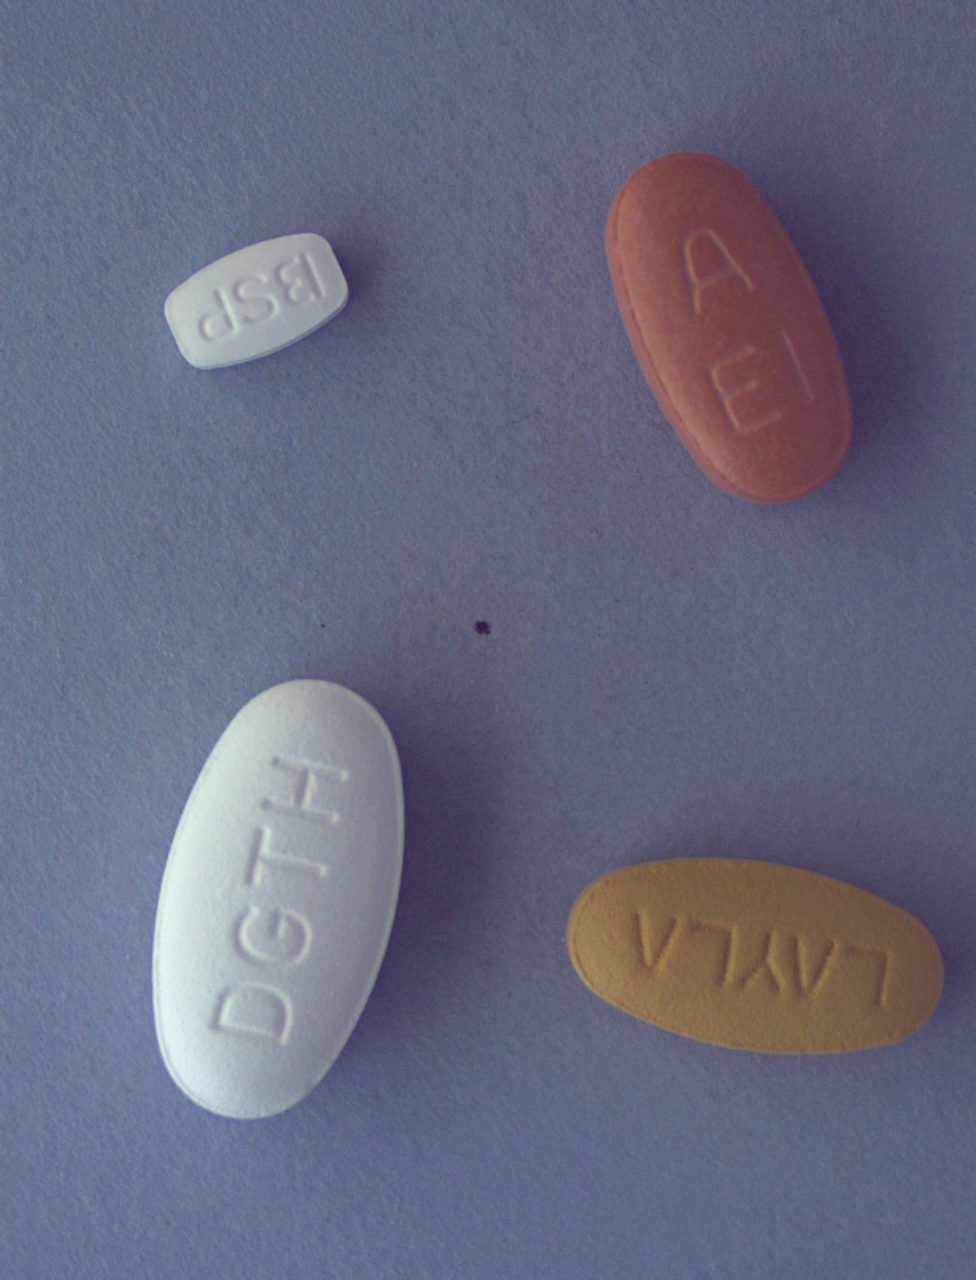

In [ ]:
display(image)

In [5]:
import json

In [ ]:
path = '/content/drive/MyDrive/Project2/DataSet/TL_1/K-001900-003544-004543-016548_json/K-001900/K-001900-003544-004543-016548_0_2_0_2_70_000_200.json'

with open(path, "r") as json_file:
    json_data = json.load(json_file)
    
print(json_data)

{'images': [{'file_name': 'K-001900-003544-004543-016548_0_2_0_2_70_000_200.png', 'width': 976, 'height': 1280, 'imgfile': 'K-001900-003544-004543-016548_0_2_0_2_70_000_200.png', 'drug_N': 'K-001900', 'drug_S': '정상알약', 'back_color': '연회색 배경', 'drug_dir': '앞면', 'light_color': '주백색', 'camera_la': 70, 'camera_lo': 0, 'size': 200, 'dl_idx': '1899', 'dl_mapping_code': 'K-001900', 'dl_name': '보령부스파정 5mg', 'dl_name_en': 'Buspar Tab. 5mg Boryung', 'img_key': 'http://connectdi.com/design/img/drug/1Mxwka5v0lL.jpg', 'dl_material': '부스피론염산염', 'dl_material_en': 'Buspirone Hydrochloride', 'dl_custom_shape': '정제, 저작정', 'dl_company': '보령제약(주)', 'dl_company_en': 'Boryung', 'di_company_mf': '', 'di_company_mf_en': '', 'item_seq': 198700706, 'di_item_permit_date': '19870323', 'di_class_no': '[01170]정신신경용제', 'di_etc_otc_code': '전문의약품', 'di_edi_code': '641901280,A09302381', 'chart': '이약은 양면볼록한 장방형의 흰색정제이다', 'drug_shape': '장방형', 'thick': 2.5, 'leng_long': 8, 'leng_short': 4.5, 'print_front': 'BSP', 'print_b

In [ ]:
print(json_data['images'][0]['drug_N'])

K-001900


In [ ]:
print(json_data['annotations'][0]['bbox'])

[690, 815, 168, 202]


In [ ]:
jString = json.dumps(json_data['images'][0]['drug_N'])

In [ ]:
print(jString)

"K-001900"


In [ ]:
type(json_data['images'][0]['drug_N'])

str

In [ ]:
#약의 번호, 이름, 이미지 박스 포인트 저장
def drugInfo(json_data):
  drugNum = json_data['images'][0]['drug_N']
  drugName = json_data['images'][0]['dl_name']
  bBox = json_data['annotations'][0]['bbox']


In [ ]:
json_path = "/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/*.json"
for f in glob.glob(json_path):          # 코드간결화 작업전
	print(f)

In [6]:
import os

DIR_IN = "/content/drive/MyDrive/Project2/DataSet/TL_1/K-000250-000573-002483-006192_json/"

file_list = os.listdir(DIR_IN)
file_list_csv = [file for file in file_list if file.endswith(".json")] # 코드간결화 작업후

In [ ]:
print(file_list_csv)

[]


In [ ]:
file_list_csv

[]

In [ ]:
from glob import glob
for filename in glob('*.json'):
  print(filename)


In [ ]:
import os
path_labels = "/content/drive/MyDrive/Project2/DataSet/TL_1/"

folder_list_labels = os.listdir(path_labels)
print("folder_list_labels: {}".format(folder_list_labels))

folder_list_labels: ['K-000250-012778-013395-037777_json', 'K-000250-013161-022362-022627_json', 'K-000250-013161-019552-022362_json', 'K-000250-012778-022362-038954_json', 'K-000250-013161-013395-023223_json', 'K-000250-012778-022362-037777_json', 'K-000250-012778-022362-044834_json', 'K-000250-013161-022362-023223_json', 'K-000250-013161-013395-019552_json', 'K-000250-013161-013395-022627_json', 'K-000250-012778-013395-044834_json', 'K-000250-012778-013395-038954_json', 'K-000250-013395-023223-038954_json', 'K-000250-013395-022627-037777_json', 'K-000250-013395-022627-044834_json', 'K-000250-013395-022627-038954_json', 'K-000250-013395-019552-037777_json', 'K-000250-013395-019552-044834_json', 'K-000250-013395-023223-037777_json', 'K-000250-019552-022362-037777_json', 'K-000250-013395-019552-038954_json', 'K-000250-013395-023223-044834_json', 'K-000573-001866-002483-006192_json', 'K-000250-022362-022627-037777_json', 'K-000573-001866-002483-023223_json', 'K-000250-022362-022627-03895

In [ ]:
path_images = "/content/drive/MyDrive/Project2/DataSet/TS_1/"

folder_list_images = os.listdir(path_images)
print("folder_list_images: {}".format(folder_list_images))

folder_list_images: ['K-000250-000573-002483-006192', 'K-000250-000573-006192-044834', 'K-000250-000573-005002-012778', 'K-000250-000573-005002-006192', 'K-000250-000573-002483-012778', 'K-000250-000573-006192-013161', 'K-000250-000573-006192-037777', 'K-000250-000573-012778-013161', 'K-000250-000573-002483-023223', 'K-000250-000573-006192-038954', 'K-000250-000573-002483-022627', 'K-000250-000573-005002-023223', 'K-000250-000573-005002-019552', 'K-000250-000573-005002-022627', 'K-000250-000573-002483-019552', 'K-000250-000573-012778-037777', 'K-000250-000573-013161-022627', 'K-000250-000573-013161-023223', 'K-000250-000573-012778-038954', 'K-000250-000573-019552-044834', 'K-000250-000573-019552-038954', 'K-000250-000573-012778-044834', 'K-000250-000573-019552-037777', 'K-000250-000573-022627-037777', 'K-000250-000573-023223-037777', 'K-000250-000573-013161-019552', 'K-000250-000573-022627-038954', 'K-000250-000573-023223-038954', 'K-000250-000573-023223-044834', 'K-000250-000573-02262

In [ ]:
folder_list_labels2 = []

In [ ]:
def jsonFind(var):
  path = "/content/drive/MyDrive/Project2/DataSet/TL_1/"
  file_path = '{}/{}'.format(path, var)
  folder_list_2 = os.listdir(file_path)
  folder_list_labels2.append(folder_list_2)
  print("folder_list_labels2: {}".format(folder_list_2))

In [ ]:
for i in folder_list_labels:
  jsonFind(i)

folder_list_labels2: ['K-000250', 'K-013395', 'K-012778', 'K-037777']
folder_list_labels2: ['K-022627', 'K-000250', 'K-022362', 'K-013161']
folder_list_labels2: ['K-013161', 'K-000250', 'K-019552', 'K-022362']
folder_list_labels2: ['K-000250', 'K-012778', 'K-038954', 'K-022362']
folder_list_labels2: ['K-023223', 'K-013161', 'K-000250', 'K-013395']
folder_list_labels2: ['K-022362', 'K-012778', 'K-000250', 'K-037777']
folder_list_labels2: ['K-022362', 'K-000250', 'K-012778', 'K-044834']
folder_list_labels2: ['K-022362', 'K-000250', 'K-023223', 'K-013161']
folder_list_labels2: ['K-000250', 'K-019552', 'K-013395', 'K-013161']
folder_list_labels2: ['K-013395', 'K-000250', 'K-013161', 'K-022627']
folder_list_labels2: ['K-044834', 'K-000250', 'K-012778', 'K-013395']
folder_list_labels2: ['K-038954', 'K-000250', 'K-012778', 'K-013395']
folder_list_labels2: ['K-000250', 'K-013395', 'K-023223', 'K-038954']
folder_list_labels2: ['K-013395', 'K-000250', 'K-022627', 'K-037777']
folder_list_labels2:

In [ ]:
folder_list_labels2

[['K-000250', 'K-013395', 'K-012778', 'K-037777'],
 ['K-022627', 'K-000250', 'K-022362', 'K-013161'],
 ['K-013161', 'K-000250', 'K-019552', 'K-022362'],
 ['K-000250', 'K-012778', 'K-038954', 'K-022362'],
 ['K-023223', 'K-013161', 'K-000250', 'K-013395'],
 ['K-022362', 'K-012778', 'K-000250', 'K-037777'],
 ['K-022362', 'K-000250', 'K-012778', 'K-044834'],
 ['K-022362', 'K-000250', 'K-023223', 'K-013161'],
 ['K-000250', 'K-019552', 'K-013395', 'K-013161'],
 ['K-013395', 'K-000250', 'K-013161', 'K-022627'],
 ['K-044834', 'K-000250', 'K-012778', 'K-013395'],
 ['K-038954', 'K-000250', 'K-012778', 'K-013395'],
 ['K-000250', 'K-013395', 'K-023223', 'K-038954'],
 ['K-013395', 'K-000250', 'K-022627', 'K-037777'],
 ['K-000250', 'K-022627', 'K-044834', 'K-013395'],
 ['K-000250', 'K-038954', 'K-022627', 'K-013395'],
 ['K-000250', 'K-013395', 'K-019552', 'K-037777'],
 ['K-019552', 'K-000250', 'K-044834', 'K-013395'],
 ['K-037777', 'K-013395', 'K-023223', 'K-000250'],
 ['K-037777', 'K-022362', 'K-00

In [30]:

path = "/content/drive/MyDrive/Project2/DataSet/TL_1/"
folderName1 = os.listdir(path)
print("folderName1: {}".format(folderName1))

folderName1: ['K-000250-000573-002483-006192_json', 'K-000250-012778-013395-037777_json', 'K-000250-013161-022362-022627_json', 'K-000250-013161-019552-022362_json', 'K-000250-012778-022362-038954_json', 'K-000250-013161-013395-023223_json', 'K-000250-012778-022362-037777_json', 'K-000250-012778-022362-044834_json', 'K-000250-013161-022362-023223_json', 'K-000250-013161-013395-019552_json', 'K-000250-013161-013395-022627_json', 'K-000250-012778-013395-044834_json', 'K-000250-012778-013395-038954_json', 'K-000250-013395-023223-038954_json', 'K-000250-013395-022627-037777_json', 'K-000250-013395-022627-044834_json', 'K-000250-013395-022627-038954_json', 'K-000250-013395-019552-037777_json', 'K-000250-013395-019552-044834_json', 'K-000250-013395-023223-037777_json', 'K-000250-019552-022362-037777_json', 'K-000250-013395-019552-038954_json', 'K-000250-013395-023223-044834_json', 'K-000573-001866-002483-006192_json', 'K-000250-022362-022627-037777_json', 'K-000573-001866-002483-023223_json'

In [31]:
#이미지 폴더명을 매개변수로 받아서 라벨 폴더 찾기
def findLabelFolder(name, addPath):
  file_path = '{}{}/{}'.format(path, addPath, name)
  folderName = os.listdir(file_path)
  print("folderName: {}".format(folderName))
  return folderName

In [32]:
Li = []
for name in folderName1:
  Li.append(findLabelFolder(name, ""))

folderName: ['K-000250', 'K-000573', 'K-002483', 'K-006192']
folderName: ['K-000250', 'K-013395', 'K-012778', 'K-037777']
folderName: ['K-022627', 'K-000250', 'K-022362', 'K-013161']
folderName: ['K-013161', 'K-000250', 'K-019552', 'K-022362']
folderName: ['K-000250', 'K-012778', 'K-038954', 'K-022362']
folderName: ['K-023223', 'K-013161', 'K-000250', 'K-013395']
folderName: ['K-022362', 'K-012778', 'K-000250', 'K-037777']
folderName: ['K-022362', 'K-000250', 'K-012778', 'K-044834']
folderName: ['K-022362', 'K-000250', 'K-023223', 'K-013161']
folderName: ['K-000250', 'K-019552', 'K-013395', 'K-013161']
folderName: ['K-013395', 'K-000250', 'K-013161', 'K-022627']
folderName: ['K-044834', 'K-000250', 'K-012778', 'K-013395']
folderName: ['K-038954', 'K-000250', 'K-012778', 'K-013395']
folderName: ['K-000250', 'K-013395', 'K-023223', 'K-038954']
folderName: ['K-013395', 'K-000250', 'K-022627', 'K-037777']
folderName: ['K-000250', 'K-022627', 'K-044834', 'K-013395']
folderName: ['K-000250',

In [57]:
finalDict = []

for i in range(0, len(Li)):
  for j in range(0, 4):
    string1 = Li[i][j]
    print(Li[i][j])
    print(folderName1[i])
    finalDict[string1] = {findLabelFolder(Li[i][j], folderName1[i])}
    #finalLi.append(findLabelFolder(Li[i][j], folderName1[i]))




#findLabelFolder(Li[0][0], folderName1[0])

K-000250
K-000250-000573-002483-006192_json
folderName: ['K-000250-000573-002483-006192_0_2_0_2_70_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_75_000_200.json', 'K-000250-000573-002483-006192_0_2_0_2_90_000_200.json']


TypeError: ignored

In [44]:
print(finalDict)

{'K-022362': ['K-000250-012778-013161-022362_0_2_0_2_75_000_200.json', 'K-000250-012778-013161-022362_0_2_0_2_70_000_200.json', 'K-000250-012778-013161-022362_0_2_0_2_90_000_200.json']}


In [53]:
print(Li[0][0])
type(Li[0][0])

K-000250


str

In [54]:
len(finalDict)

1

In [51]:
print(finalDict['K-022362'])

['K-000250-012778-013161-022362_0_2_0_2_75_000_200.json', 'K-000250-012778-013161-022362_0_2_0_2_70_000_200.json', 'K-000250-012778-013161-022362_0_2_0_2_90_000_200.json']


In [ ]:
for i in range(0, len(finalDict)):
  for j in range(0, 3):
    jsonName = finalLi[i][j]
    finalFileName = jsonName[:len(jsonName)-5]+""

for i in range(0, len(Li)):
  for j in range(0, 4):
    print(Li[i][j])
    print(folderName1[i])
    finalDict[Li[i][j]]
    finalDict = {Li[i][j]: findLabelFolder(Li[i][j], folderName1[i])}
    #finalLi.append(findLabelFolder(Li[i][j], folderName1[i]))

for 

In [40]:
type(finalLi[0][0])

str

KeyError: ignored